Notes on [An Introduction to Statistical Learning (ISL)](http://faculty.marshall.usc.edu/gareth-james/ISL/), [The Python Data Science Handbook (PDSH)](https://jakevdp.github.io/PythonDataScienceHandbook/), [The Hundred Pages Machine Learning Book (THPB)](http://themlbook.com) and other resources.

The idea is to read through ISL and (THPB), and implement basic algorithms using PDSH, and colsult other resources when necessary.

In [1]:
import numpy as np
import scipy as sp
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
pd.set_option('max_colwidth', None)

%load_ext autoreload
%autoreload 2


# Basics

Estimating $f$

- The purpose of statistical learning is often to infer a function $f$ that describes the relationship between an outcome variable $y$ and a set of input variables (features) $x$.

- We can be interested in $f$ for two reasons: prediction, predicting $y$ for a set of $x$, or prediction, understanding the relationship between the componenets of $x$ and $y$.

- We can estimate $f$ using three basic approaches: parametric methods, which impose a functional form on $f$ and reduce the problem to estimating a finite set of parameters, one for each element in $x$; non-parametric methods, which optimise for the best type of function and its parametrs; and semi-parametric methods, a mix of the two.

- In general, the accuracy of our predictor depends on two quantities: the reducible error, which is a function of how well our model is specified, and the irreducible error, which we cannot affect as it is a result of unmeasured or unmeasurable determinants of our outcome captured by the error term.



Prediction accuracy vs model interpretability trade-off

- Linear models often produce worse predictions but are easy to interpret, while non-linear models (trees, SVM) do better at predicting but are hard to impossible to interpret.

# Assessing model accuracy

Sources: ISL, PDSH, [ML mastery](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

Measuring the quality of fit

- In a regression setting, the most common measure for quantifying the accuracy of our predictor, $\hat{f}$, is the Mean Squared Error (MSE), calculated as $MSE = \frac{1}{n} \sum^n_{i=1} (y_i - \hat{f}(x_i))^2 = \frac{1}{n} \sum^n_{i=1} (y_i - \hat{y})^2$.

- In a classification setting, the most common measure is the error rate, calculated as: $\frac{1}{n} \sum^n_{i=1} I(y_i \neq \hat{y})$.

- In both cases, we want a model that scores well on a test, rather than the training dataset, as optimising the score for the training dataset will often lead to overfitting (a situation where a less flexible model with a worse training score would have achieved a better testing score).


The bias-variance trade-off

- The MSE can be decomposed into $E(y_0 - \hat{f}(x_0))^2 = Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\epsilon)$, the variance of our estiamtes, the squared bias of our estimates, and the variance of the error term (this is the irreducible error). Hence, we want a model that has low bias and low variance.

- Variance is the amount by which $\hat{f}$ changes if we estimated it using a different training dataset. In general, the more flexible the model, the higher the variance (in the extreme, the model fits each observation perfectly, and observations vary between training datsets).

- Bias is the amount by which the model is inaccurate. In general, less flexibel models have a higher bias (in the extreme, a horiontal line in a regression problem with one predictor will have high bias).

- Hence, the MSE is U-shaped as a function of model flexibility, driven by decreasing bias but incresing variance as flexibility increases. In practice, we thus seek a model that balances the two.

- One way to get a sense of how non-linear the problem is, is to compare the MSE of a simple linear model and a more complex model. If the two are very close, then assuming linearity and using a simple model is preferrable.

Confusion matrix

- Can be used to calculate precision, recall, specificity, accuracy, etc.

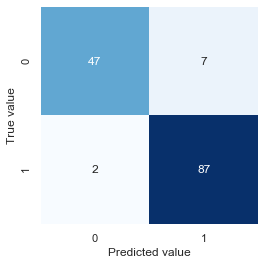

In [49]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

data = load_breast_cancer()
Xtrain, Xtest, ytrain, ytest = train_test_split(data.data, data.target, random_state=23124)
model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)

mat = confusion_matrix(ytest, ymodel)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('Predicted value')
plt.ylabel('True value');

- True positive: there was an event and we predicted one.
- True negative: there was no event and we didn't predict one.
- False positive: there was no event but we predicted one (i.e. we predicted 1 instead of 0).
- False negative: there was an event but we didn't preditc one (i.e. we predicted 0 instead of 1)

ROC curves and AUC

- Plots the trade-off between the false positive rate (x-axis) and the true positive rate (y-axis) - the trade-off between the false alarm rate and the hit rate.

- True positive rate $= \frac{True Positives}{True Positives + False Negatives} = \frac{True Positives}{All Events}$.

- The true positive rate is also called sensitivity. And we can think of it as the hit rate: the propostion of events that we correctly classified as such.

- False positive rate $= \frac{False Positives}{False Positives + True Negatives} = \frac{False Positives}{All NonEvents}$.

- The false positive rate is also called the false alarm rate, the proportion of cases incorrectly classified as an event among all cases that are not an event. It is also referred to as inverterd specificity, where specificity is $= \frac{True Negatives}{False Positives + True Negatives}$.

- The ROC is useful because it directly shows false/true negatives (on the x-axis) and false/true positives (on the y-axis) for different thresholds and thus helps choose the best threshold, and because the AUC can be read as an overall model summary, and thus allows us to compare different models. 



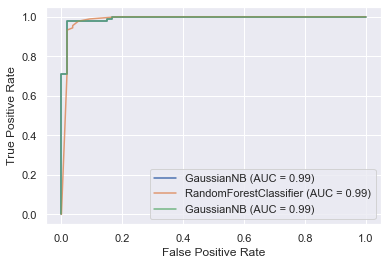

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

roc = plot_roc_curve(model, Xtest, ytest)
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(Xtrain, ytrain)
ax = plt.gca()
_ = plot_roc_curve(rfc, Xtest, ytest, ax=ax, alpha=0.8)
roc.plot(ax=ax, alpha=0.8);

Precision-recall curves

- Precision and recall originate in the field of information retrieval (e.g. getting documents from a query) but are also useful in machine learning. 

- Precision $= \frac{True Positives}{True Positives + False Positives} = \frac{True Positives}{All Positives}$

- Recall $= \frac{True Positives}{True Positives + False Negatives} = \frac{True Positives}{All Events}$

- In the context of document retriavel, precision is the useful documents as a proportion of all retrieved documents, recall the retrieved useful documents as a proportion of all available useful documents.

- We can think of precision as positive predictive power (how good is the model at predicting the positive class?), while recall is the same as sensitivity -- the proportion of all events that were successfully predicted.

- The precision-recall curve is particularly useful when we have much more no-event than event cases. In this case, we're often not interested much in correctly predicting no-events but focused on correctly predicting events. Because neither precision nor recall use true negatives in their calculations, they are well suited to this context ([paper](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432)).

- The precision recall curve plots precision (y-axis) and recall (x-axis). An unskilled model is a horizontal line at hight equal to the proportion of events in the sample. We can use ROC to compare models as different thresholds, or the F-score (the harmonic mean between precision and recall) at a specific threshold.

- Use precision-recall curves if classes are imbalanced, in which case ROC can be misleading (see example in last section [here](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)).

- Shape of curve: recall increases monotonically as we lower the threshold (move from left to right in the graph) because we'll find more and more true positives ("putting ones from the false negative to the true positive bucket", which increases the numerator but leaves the denominator unchanged), but precision needn't fall monotonically, because we also increase false positives (both the numerator and the denominator increase as we lower the threshold, and the movement of recall depends on which increases faster, which depends on the sequence of ordered predicted events). See [here](https://stats.stackexchange.com/a/183506) for a useful example.






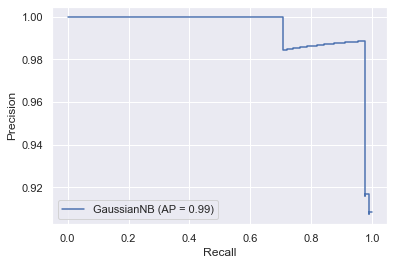

In [62]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, Xtest, ytest);

# Linear regression

In [5]:
path = 'http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv'
cols = ['TV', 'radio', 'newspaper', 'sales']
df = pd.read_csv(path, usecols=cols).rename(lambda x: x.lower(), axis=1)
print(df.shape)
df.head(1)

(200, 4)


,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1


Let's start by looking at the data.

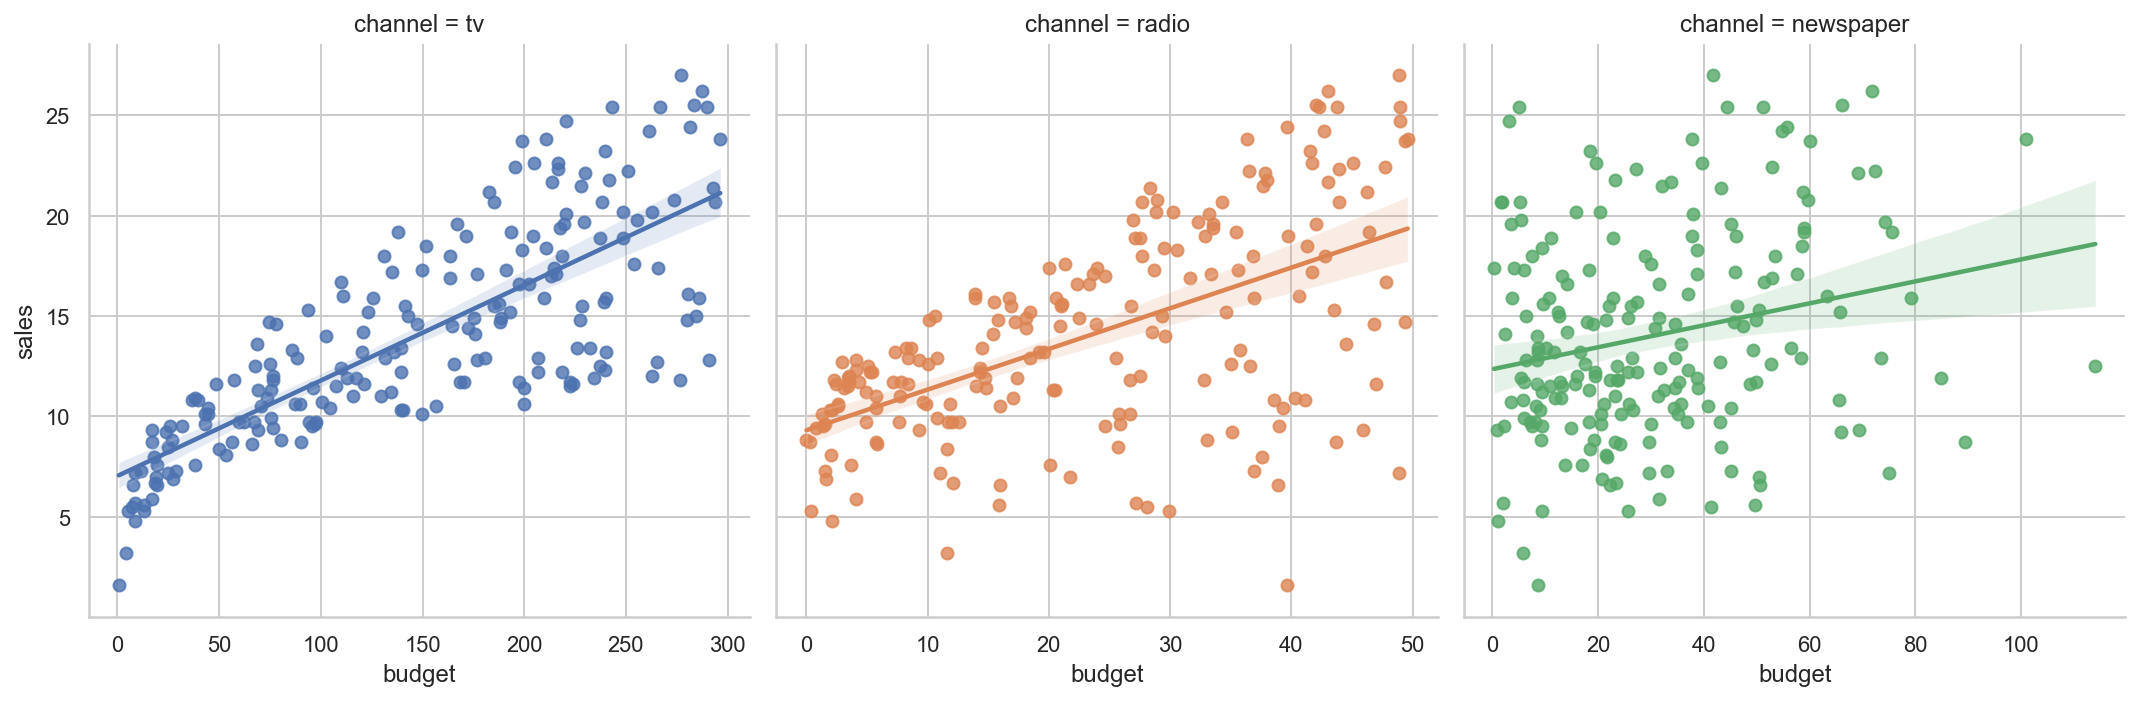

In [10]:
tidy = (df.reset_index()
        .rename(columns={'index': 'market'})
        .melt(id_vars=['market', 'sales'],
              var_name='channel', 
              value_name='budget'))

sns.lmplot(x='budget', y='sales', hue='channel', col='channel',
           sharex=False, data=tidy);

## Estimation

In [15]:
mod = sm.OLS.from_formula('sales ~ tv + radio + newspaper', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.58e-96
Time:                        18:28:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

## Evaluating fit

Residual standard error

In [18]:
rse = np.sqrt(res.scale)
x_mean = df.sales.mean()

print(rse)
print(rse/ x_mean)

1.685510373414744
0.1202004188564624


- The RSE is 3.25, which implies that our estimates deviate about 3.25 from the actual values (this would be true even if we knew the population parameters, as the RSE is an estimate of the error standard deviation). Given the average value of sales, the percentage error is about 12 percent. Whether this is a lot or not depends on the application. 

- Becaue the RSE is an absolute measure of lack of fit, expressed in units of y, it's not always easy to interpret whether a given RSE is small or large.



$R^2$

- $R^2$, which is a relative measure of lack of fit, and measures the percentage of variance in y that the model can explain (and is thus always between 0 and 1). In the simple linear regression setting, $R^2 = Cor(X, Y)^2$.

- A low $R^2$ can mean that the true relationship is non-linear or that the error variance is very high or both. What constitutes "low" depends on the application.

- In the model above, more than 90 percent of the variation is explained by the set of explanatory variables.

In [14]:
res.rsquared

0.611875050850071

## Questions of interest

Is at least one of the predictors useful in explaining y?

- To test whether at least one of the predictors is useful in predicting the response, we can look at the reported F statistic.

In [25]:
res.fvalue, res.f_pvalue

(570.2707036590942, 1.575227256092437e-96)

- To test whether a subset of parameters is useful, we can run our own F-test. To manually test for all parameters, we can use:

In [32]:
a = np.identity(len(res.params))[1:]
res.f_test(a)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[570.27070366]]), p=1.5752272560925203e-96, df_denom=196, df_num=3>

- Which is equivalent to the statistic provided in the output. To test the (joint) usefulness of radio and newspaper, we can use:

In [40]:
a = np.identity(len(res.params))[[2, 3]]
res.f_test(a)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[272.04067681]]), p=2.829486915701129e-57, df_denom=196, df_num=2>

- Remember: the F statistic is valuable because irrespective of $p$, there is only a 5 percent change that the p-value is below 0.05. In contrast, individual predictors each have that probability, so for a large number of predictors, it's very likely that we observe significant ones solely due to chance.

Are all of the predictors or only a subset useful in explaining y?

# Classification

## Logistic regression

The (general) logistic function is a curve with equation:

$$f(x) = \frac{L}{1 + e^{-k(x - x_0)}},$$

where $L$ is the asymptotic upper value of the curve, $e$ is the base of the natural logarithm, $k$ is the steepness of the curve, and $x_0$ is its midpoint.

The standard logistic function, with $L = k = 1$ and $x_0 = 0$ maps values from minus infinity to plus infinity to between 0 and 1. 

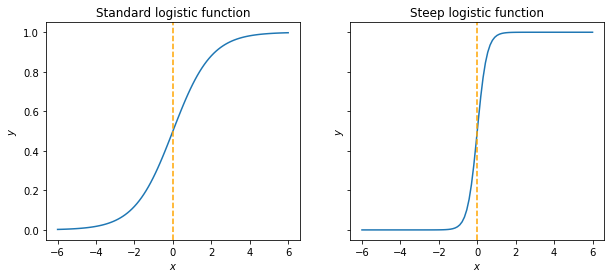

In [80]:
def general_logistic(x, L, k, x0):
    return L / (1 + np.exp(-k*(x - x0)))
    
x = np.linspace(-domain, domain, 100)

fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

ax0.plot(x, general_logistic(x, 1, 1, 0))
ax0.axvline(0, color='orange', linestyle='dashed')
ax0.set(title='Standard logistic function', xlabel='$x$', ylabel='$y$')

ax1.plot(x, general_logistic(x, 1, 4, 0))
ax1.axvline(0, color='orange', linestyle='dashed')
ax1.set(title='Steep logistic function', xlabel='$x$', ylabel='$y$');

# Sources

- [Wikipedia](https://en.wikipedia.org/wiki/Logistic_function)

- [Roc](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)